<a href="https://colab.research.google.com/github/Samsonasumu/PYTHON-DATA-SCIENCE/blob/main/ML__RANDOM_FOREST(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/predictive failure maintenance dataset (1).csv")

In [ ]:
df.head

<bound method NDFrame.head of         UDI ProductID Type  Airtemperature[K]  Processtemperature[K]  \
0         1    M14860    M              298.1                  308.6   
1         2    L47181    L              298.2                  308.7   
2         3    L47182    L              298.1                  308.5   
3         4    L47183    L              298.2                  308.6   
4         5    L47184    L              298.2                  308.7   
...     ...       ...  ...                ...                    ...   
9995   9996    M24855    M              298.8                  308.4   
9996   9997    H39410    H              298.9                  308.4   
9997   9998    M24857    M              299.0                  308.6   
9998   9999    H39412    H              299.0                  308.7   
9999  10000    M24859    M              299.0                  308.7   

      Rotationalspeed[rpm]  Torque[Nm]  Toolwear[min]  Target  FailureType  
0                     1551  

#PREPROCESSING

In [ ]:
#Remove empty spaces in pd columns
df.columns = df.columns.str.replace(' ', '')
df.columns

Index(['UDI', 'ProductID', 'Type', 'Airtemperature[K]',
       'Processtemperature[K]', 'Rotationalspeed[rpm]', 'Torque[Nm]',
       'Toolwear[min]', 'Target', 'FailureType'],
      dtype='object')

In [ ]:
df.isna().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

no null values present

In [ ]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


<Axes: >

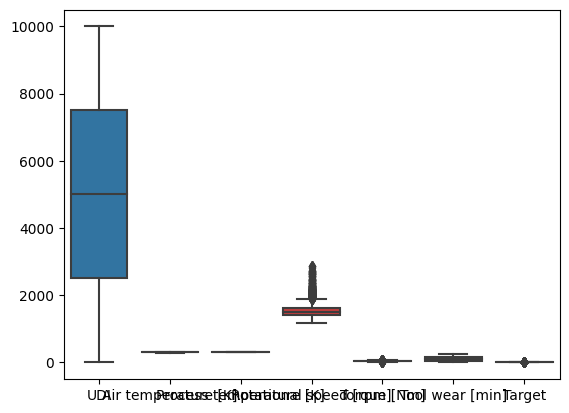

In [ ]:
sns.boxplot(data=df)
#there are some outlers in the dataset as shown by the followinng boxplots


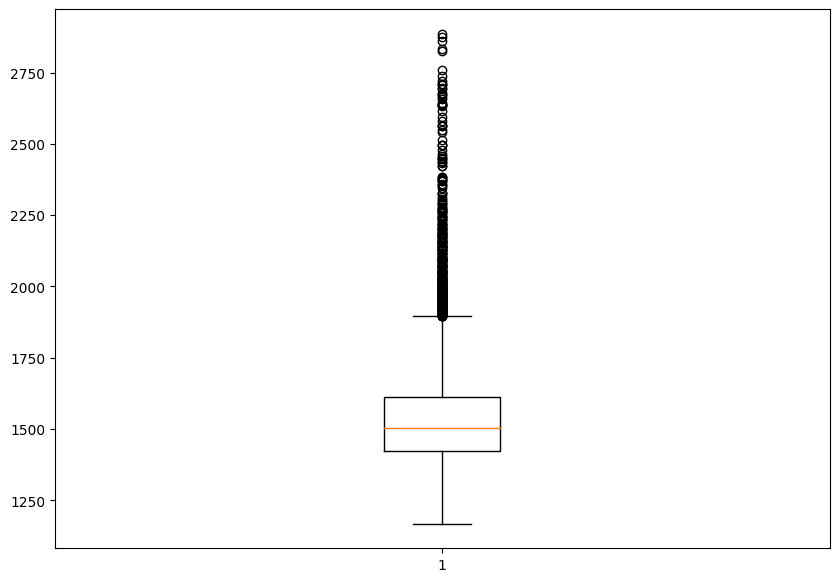

In [ ]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(df['Rotational speed [rpm]'])
 
# show plot
plt.show()

In [ ]:
df.pop('ProductID')


0       M14860
1       L47181
2       L47182
3       L47183
4       L47184
         ...  
9995    M24855
9996    H39410
9997    M24857
9998    H39412
9999    M24859
Name: ProductID, Length: 10000, dtype: object

In [ ]:
df.rename(columns={'Rotationalspeed[rpm]': 'Rotationalspeed'})


,UDI,ProductID,Type,Airtemperature[K],Processtemperature[K],Rotationalspeed,Torque[Nm],Toolwear[min],Target,FailureType
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [ ]:

def remove_outlier(df, Rotationalspeed):
    q1 = df[Rotationalspeed].quantile(0.25)
    q3 = df[Rotationalspeed].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_no_outlier = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_no_outlier

#RANDOM FOREST 

In [ ]:
 #transforming the dependent column
 df['FailureType'] = df['FailureType'].map({'No Failure':0,'Failure':1})


In [ ]:
#df_new.replace("nan",nan_value,inplace=True)
#df_new.dropna(how="all",axis=0,inplace=True)
#df_new.FailureType.unique()
df_new.dropna(inplace=True)
#df_new = df_new.reset_index(drop=True)
df_new['FailureType'].unique()



array([0.])

In [ ]:
k = pd.get_dummies(df.Type)
print(k.head())

df_new = pd.get_dummies(df, columns=["Type"])
df_new

   H  L  M
0  0  0  1
1  0  1  0
2  0  1  0
3  0  1  0
4  0  1  0


,UDI,Airtemperature[K],Processtemperature[K],Rotationalspeed[rpm],Torque[Nm],Toolwear[min],Target,FailureType,Type_H,Type_L,Type_M
0,1,298.1,308.6,1551,42.8,0,0,0.0,0,0,1
1,2,298.2,308.7,1408,46.3,3,0,0.0,0,1,0
2,3,298.1,308.5,1498,49.4,5,0,0.0,0,1,0
3,4,298.2,308.6,1433,39.5,7,0,0.0,0,1,0
4,5,298.2,308.7,1408,40.0,9,0,0.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,298.8,308.4,1604,29.5,14,0,0.0,0,0,1
9996,9997,298.9,308.4,1632,31.8,17,0,0.0,1,0,0
9997,9998,299.0,308.6,1645,33.4,22,0,0.0,0,0,1
9998,9999,299.0,308.7,1408,48.5,25,0,0.0,1,0,0


In [ ]:
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [ ]:
# Split the data into features (X) and target (y)
X = df_new.drop('FailureType', axis=1)
y = df_new['FailureType']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
#df['Type'].unique()
df_new

,UDI,Airtemperature[K],Processtemperature[K],Rotationalspeed[rpm],Torque[Nm],Toolwear[min],Target,FailureType,Type_H,Type_L,Type_M
0,1,298.1,308.6,1551,42.8,0,0,0.0,0,0,1
1,2,298.2,308.7,1408,46.3,3,0,0.0,0,1,0
2,3,298.1,308.5,1498,49.4,5,0,0.0,0,1,0
3,4,298.2,308.6,1433,39.5,7,0,0.0,0,1,0
4,5,298.2,308.7,1408,40.0,9,0,0.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,298.8,308.4,1604,29.5,14,0,0.0,0,0,1
9996,9997,298.9,308.4,1632,31.8,17,0,0.0,1,0,0
9997,9998,299.0,308.6,1645,33.4,22,0,0.0,0,0,1
9998,9999,299.0,308.7,1408,48.5,25,0,0.0,1,0,0


In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test)


In [ ]:
#THE MODEL HAS 100% ACCURACY SCORE
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


#visualizing the results

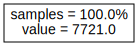

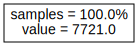

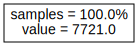

In [ ]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

#Hyperparameter Tuning



In [ ]:
from scipy.stats import randint
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f1872d09540>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f1872caeec0>})

In [ ]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)


Best hyperparameters: {'max_depth': 8, 'n_estimators': 333}


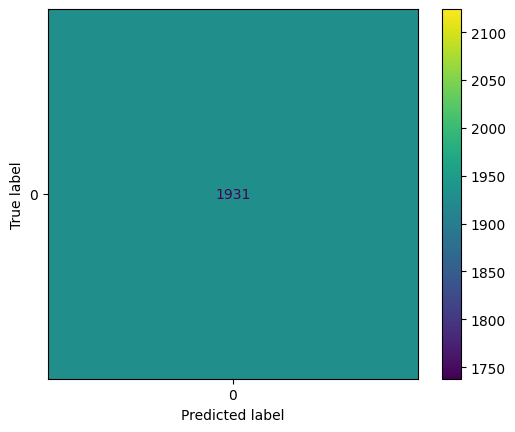

In [ ]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

#GRADIENT BOOSTING[link text](https://)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc=GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=100,max_features=5 )
# Fit train data to GBC
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# transform data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)


In [ ]:
def gbdt_classifier(train_vecs, y_train, test_vecs, y_test):
    clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=10, random_state=0)
    clf.fit(train_vecs, y_train)
    joblib.dump(clf, storedpaths + 'model_gbdt.pkl')
    test_scores = clf.score(test_vecs, y_test)
    return test_scores
